**Problem Statement:**
The problem statement is to predict the sale price of a house, given the features of the house. The features are the columns in the dataset, and the target variable is the SalePrice column. The problem is a regression problem, as the target variable is continuous.



In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
rlst=pd.read_csv('/content/Real estate.csv')
rlst.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [88]:
rlst.shape

(414, 8)

In [89]:
rlst.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [90]:
rlst.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In this dataset we don't have any null values, If there are null values present in the data we will use fillna and  Simple Imputer for filling the null values by using mean or median for numerical data and we can use mode for categorical data.


In [91]:
rlst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


if we want to change the dtype we will use astype or simple imputer to chane the dtypes.

In [92]:
rlst=rlst.drop('No',axis=1)

<AxesSubplot:>

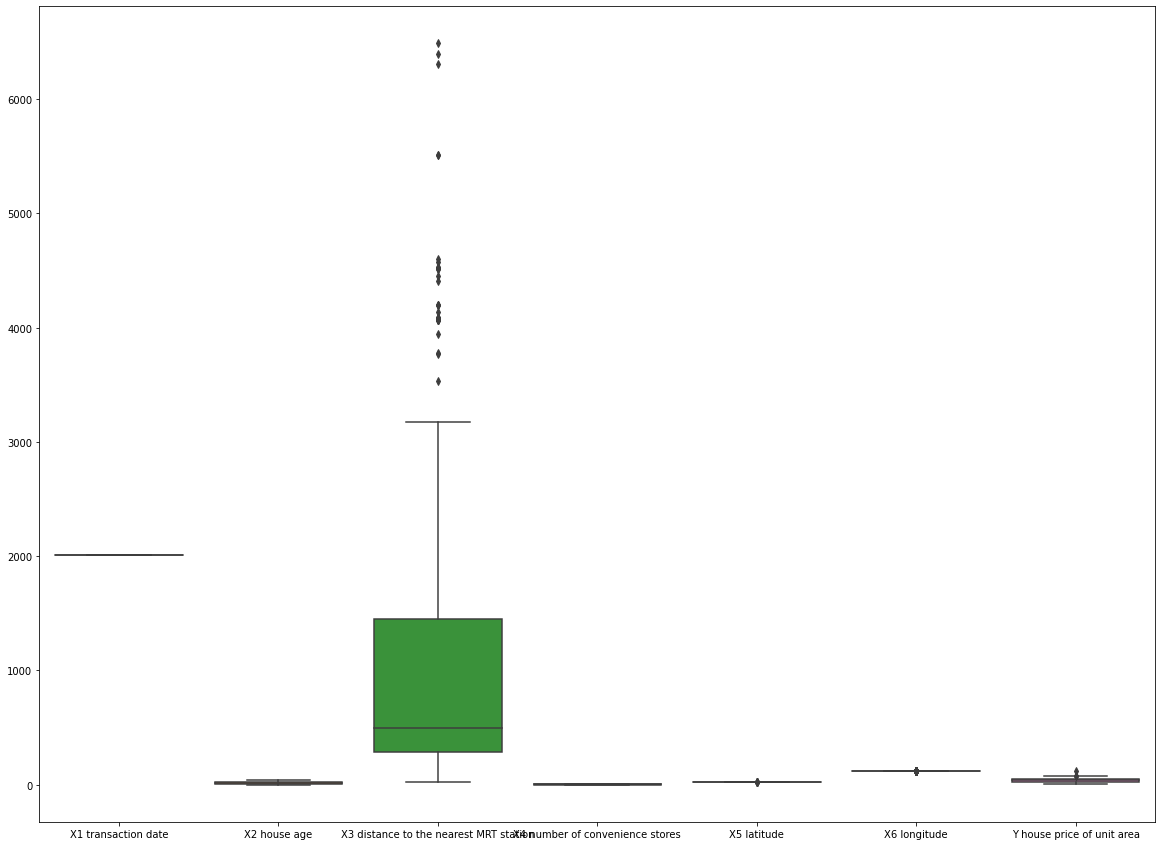

In [93]:
fig = plt.figure(figsize =(20, 15))
sns.boxplot(data=rlst)


By ploting box plot we will get the outlayers.We have outlayers in "X3 distance to the nearest MRT station" column.so.
I didn't drop outlayers due to th column is one of the useful feature.
If we want to drop the by using quantile method for droping the outlayers by how much %.

x=rlst['column'].quantile[0.x]
rlst=rlst[rlst['column']<x]

above process will help in droping the outlayers.



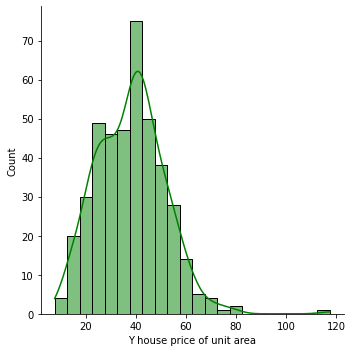

In [94]:
sns.displot(data= rlst, x='Y house price of unit area', kde=True , color='g')

 Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it.(Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis. Setting the hist flag to False in distplot will yield the kernel density estimation plot.)

In [95]:
rlst = np.log(rlst)


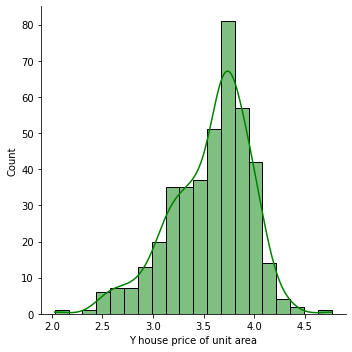

In [96]:
sns.displot(data= rlst, x='Y house price of unit area', kde=True , color='g')

<AxesSubplot:>

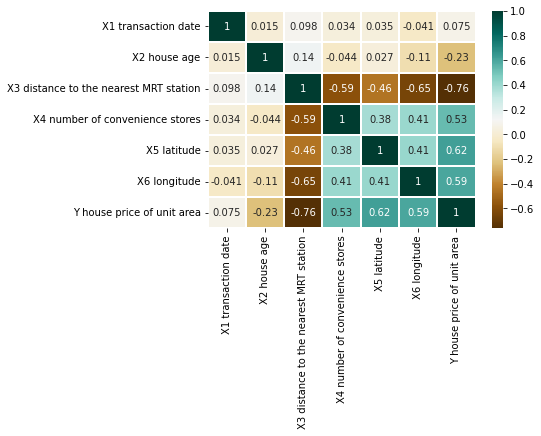

In [97]:
sns.heatmap(rlst.corr(),cmap = 'BrBG',linewidths = 2,annot = True)

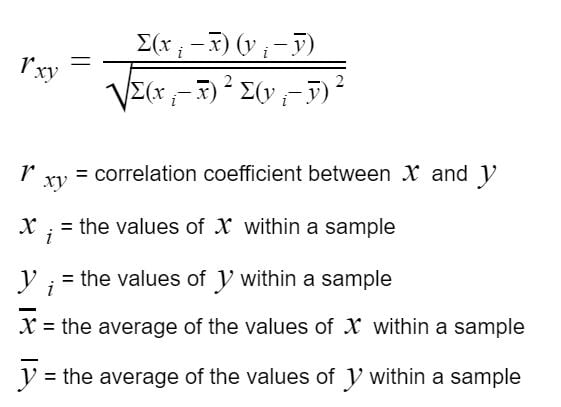



In this we get the correlation between the columns. If there are more colums in the data with high correlation we will drop the columns if they are not required for the analsys.

In [98]:
X=rlst.drop('Y house price of unit area', axis=1)
y=rlst['X4 number of convenience stores']

In [99]:
X.shape

(414, 6)

In [100]:
X.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [101]:
training_data = rlst.sample(frac=0.8, random_state=25)
testing_data = rlst.drop(training_data.index)

In [102]:
X_train=training_data.drop('Y house price of unit area', axis=1)
y_train=training_data['X4 number of convenience stores']
X_test=testing_data.drop('Y house price of unit area', axis=1)
y_test=testing_data['X4 number of convenience stores']

In [103]:
print(training_data.shape)
print(testing_data.shape)

(331, 7)
(83, 7)


# Model

In [115]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

In [132]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._build_tree(X, y)
    def _build_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._build_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._build_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    